In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns # data visualization

# Read data and data manipulation

In [175]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [176]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [178]:
data['Channel'].unique()

array([2, 1], dtype=int64)

In [179]:
data['Region'].unique()

array([3, 1, 2], dtype=int64)

In [180]:
data['Channel'] = data['Channel'].map({2:0,1:1})

In [181]:
data['Region'] = data['Region'].map({1:'a',2:'b',3:'c'})

In [182]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,c,12669,9656,7561,214,2674,1338
1,0,c,7057,9810,9568,1762,3293,1776
2,0,c,6353,8808,7684,2405,3516,7844
3,1,c,13265,1196,4221,6404,507,1788
4,0,c,22615,5410,7198,3915,1777,5185


In [183]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_b,Region_c
0,0,12669,9656,7561,214,2674,1338,0,1
1,0,7057,9810,9568,1762,3293,1776,0,1
2,0,6353,8808,7684,2405,3516,7844,0,1
3,1,13265,1196,4221,6404,507,1788,0,1
4,0,22615,5410,7198,3915,1777,5185,0,1


# use sdandard scaler and run clustering

In [184]:
#use sdandardscaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_std = std.fit_transform(data.iloc[:,1:7].values)

C:\Users\Mengyu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [185]:
#run the clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, init= 'k-means++',max_iter = 300, random_state = 1, n_init = 10, tol = 1e-04)
y_km = km.fit_predict(data_std)

In [186]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 1058.77


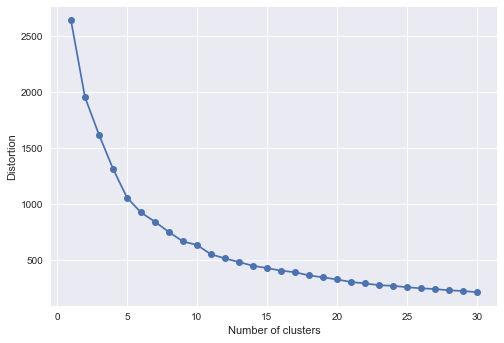

In [187]:
#use elbow method to find the best n_clusters
distortions = []
for i in range(1,31):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=1)
    km.fit(data_std)
    distortions.append(km.inertia_)
    
plt.plot(range(1,31), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
##seems that 25 is a good choice

In [188]:
##then let's see the performance of clustering
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples

In [189]:

kmeans = KMeans(n_clusters=25, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=1)
kmeans.fit(data_std)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

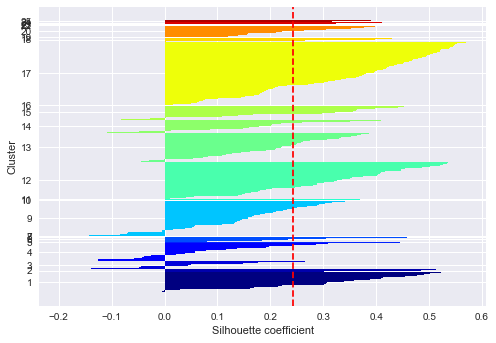

In [190]:
silhouette_vals = silhouette_samples(data_std, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

###seems that this model doesn't work well, so let's try another one

# use minmax scaler and run the clustering

In [191]:
#let's use min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data_mm = mms.fit_transform(data.values)

C:\Users\Mengyu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [192]:
# also, run the clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, init= 'k-means++',max_iter = 300, random_state = 1, n_init = 10, tol = 1e-04)
y_km = km.fit_predict(data_mm)

In [193]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 28.68


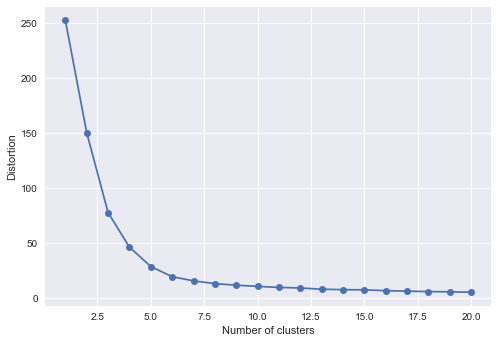

In [194]:
#let's find a best choice of n_clusters
distortions = []
for i in range(1,21):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=1)
    km.fit(data_mm)
    distortions.append(km.inertia_)
    
plt.plot(range(1,21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
##seems that 10 is a good choice

In [195]:
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples

In [196]:

kmeans = KMeans(n_clusters=10, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=1)
kmeans.fit(data_mm)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

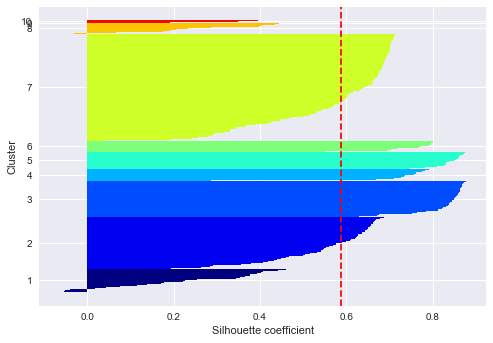

In [197]:
silhouette_vals = silhouette_samples(data_mm, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
##this model is better than the one abovebb

# Visualization


In [199]:
data_mm_pd = pd.DataFrame(data_mm,columns=list(data.columns))

In [200]:
labels = kmeans.labels_
data_mm_pd["cluster"] = labels

In [201]:
data_mm_pd.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_b,Region_c,cluster
0,0.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,1.0,1
1,0.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,1.0,1
2,0.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,1.0,1
3,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0.0,1.0,6
4,0.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,1.0,1


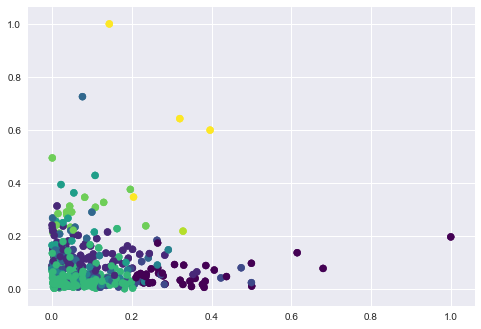

In [204]:
df = data_mm_pd
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=df["cluster"], s=50, cmap='viridis')
plt.show()

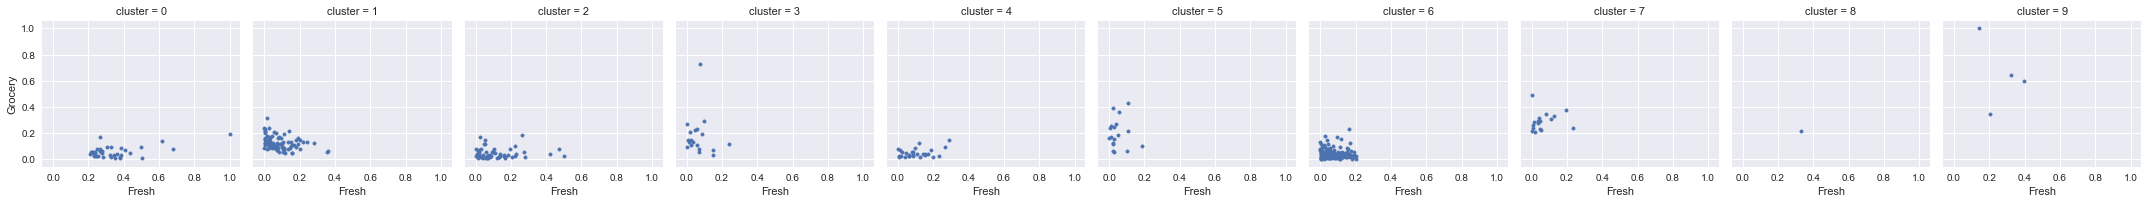

In [209]:
g = sns.FacetGrid(df, col="cluster")
g = g.map(plt.scatter, "Fresh", "Grocery", marker=".")
plt.show()